<a href="https://colab.research.google.com/github/JuanSol26/Data-Science-3---Solinas-Juan/blob/main/Data_Science_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10-conclusión

11-hacer comentarios del paso a paso

Hacer 3 graficos en Sentimientos, en orden de clasificación y en nube de palabras

Ver el TF-IDF y el BoW que armamos, comparando con las clases para hacer comentarios

Ver si sumamos la clase 7 a todos estos pasos

y ver de  aplicar random forest o logistic regresion

y generar matriz de confusion

y hacer con las más vistas

ver 1:53 para ver el gráfico de comparacion de nubes de palabras

ver el video 1:34 para ver el objetivo que puso en su notebook para copiarlo




https://www.kaggle.com/datasets/andrsmosquera/crticas-pelculas-filmaffinity-en-espaol-netflix?resource=download



# Estructura

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")
pd.set_option('display.max_colwidth', None)

In [623]:
url_1 = "https://github.com/JuanSol26/Data-Science-3---Solinas-Juan/raw/refs/heads/main/Ds%203.xlsx"

reviews = pd.read_excel(url_1)

In [624]:
reviews.head()

film_name                        gender  film_avg_rate  \
0  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
1  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
2  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
3  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
4  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   

   review_rate                         review_title  \
0            1                              Respira   
1            2  Esta serie te llama tonto a la cara   
2            1                              Respira   
3            1             Imposible, no hay manera   
4            1                        Serie nefasta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review_text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.  
1                                                                                                 Todo lo malo que puede tener una serie lo posee "Respira". Los diálogos son penosos, los personajes son puras caricaturas, las tramas se ven venir de lejos y los actores... Pues las tres caras de siempre, ninguna de las cuales sabe vocalizar, y luego las cuotas que tocan y para casa. Aitana, maja, ¿Qué haces metida aquí?En estos días también estoy viendo la segunda temporada de "La edad dorada" y no es por comparar, pero voy a hacerlo. Esa también es una serie ligera que no viene a salvar el mundo, pero es que no hay ápice posible de similitud. En ningún sentido. Aquí no hay nada cuidado. Es pura basura cuyos implicados, todos sin excepción, saben positivamente que lo es.Y yo, que suelo tener el estómago hecho a todo, me he sentido ofendido viendo "Respira". Me he sentido insultado. Tonto de baba.  
2                                                                                                                                                                                                                                                                                                                                                           La serie es un drama médico que intenta "copiar" los estilemas yankies adaptándolos al modo español.La historia de base transcurre en un hospital valenciano representado 

In [625]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5073 entries, 0 to 5072
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film_name      5073 non-null   object 
 1   gender         5073 non-null   object 
 2   film_avg_rate  5073 non-null   float64
 3   review_rate    5073 non-null   int64  
 4   review_title   5073 non-null   object 
 5   review_text    5073 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 237.9+ KB


Se puede ver en el DataFrame que no hay datos nulos

In [626]:
np.sort(reviews.film_name.unique())

array(['(Des)encanto (Serie de TV)', '10 días de un mal hombre ',
       '1670 (Serie de TV)', '60 minutos ',
       'A la caza de espíritus malignos (Serie de TV)',
       'A la caza del asesino (Serie de TV)', 'A través de tu mirada ',
       'A través del mar ',
       'ARA San Juan: El submarino que desapareció (Serie de TV)',
       'Accidente (Serie de TV)', 'Adiós, Tierra (Serie de TV)',
       'Agencia Bien de amores ', 'Agente Stone ', 'Al borde del abismo ',
       'Alejandro Magno: La creación de un dios (Serie de TV)',
       'American Symphony ', 'Amor en aguas turbulentas ',
       'Amor, acoso, asesinato ', 'Amy Schumer: Emergency Contact (TV)',
       'Antares de la Luz: La secta del fin del mundo ',
       'Antracita (Serie de TV)',
       'Aquellos maravillosos 90 (Serie de TV)', 'As bestas ',
       'Asesinato para principiantes (Miniserie de TV)', 'Atlas ',
       'Atrapaalmas ', 'Avatar: La leyenda de Aang (Serie de TV)',
       'Baby Bandito (Serie de TV)', 'Baila

In [627]:
reviews.film_name.value_counts()

film_name
La sociedad de la nieve                          271
As bestas                                        246
The Witcher (Serie de TV)                        156
Cazafantasmas: Más allá                          122
El asesino                                       119
                                                ... 
El príncipe que nunca reinó (Miniserie de TV)      1
Ōoku: Los aposentos privados (Serie de TV)         1
iNumber Number: El oro de Johannesburgo            1
A la caza del asesino (Serie de TV)                1
Príncipes salvajes                                 1
Name: count, Length: 438, dtype: int64

En este recuento se puede observar que no hay películas o series duplicadas por errores de tipeo, así como en las 5073 reseñas se reparten 438 series/películas.

In [628]:
reviews["gender"].value_counts()

gender
Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único    271
Thriller, Drama, Vida rural                                                                                            246
Serie de TV, Fantástico, Aventuras, Fantasía medieval, Brujería, Videojuego                                            156
Fantástico, Comedia, Sobrenatural, Fantasmas, Secuela                                                                  122
Thriller, Intriga, Crimen, Cómic                                                                                       119
                                                                                                                      ... 
Serie de TV, Documental, Crimen, True Crime                                                                              1
Acción, Aventuras, Policíaco                                                                                             1
Serie de TV, Animación, Fantástico, Drama, Manga                                                                         1
Serie de TV, Documental, Miniserie de TV, True Crime                                                                     1
Documental, Inteligencia artificial                                                                                      1
Name: count, Length: 406, dtype: int64

Lo que se puede observar es que varias reseñas clasifican con más de un género a las películas a las que destinan su crítica. Es por ello que se procedera a crear una columna nueva donde se incluya solo el primer género indicado por los diferentes reseñistas.

In [629]:
#creación de dataset para dividir a los diferentes géneros de cáda película
reviews2 = reviews.gender.str.split(',', expand=True)
reviews2.columns= ["Género 1", "Género 2", "Género 3", "Género 4", "Género 5", "Género 6", "Género 7", "Género 8", "Género 9", "Género 10","Género 11","Género 12", "Género 13"]

In [630]:
#incorporación de una columna con el nombre de la Serie/Película al DataFrame para dividir los géneros de cada película
reviews2["Nombre"] = reviews.film_name
reviews2 = reviews2.set_index("Nombre")

In [631]:
#Creación de una función para no contabilizar como género a la codificación "Serie de TV"
def gen(x):
    if x == "Serie de TV":
      return "None"
    else:
        return x

In [632]:
reviews2["Género 1"]= reviews2["Género 1"].apply(gen)

In [633]:
#Se aplica la función mask para que, en caso de que el género de la primer columna de reviews 2 indique "None", se copie el valor de la columna "Género 2"
reviews2["Género 1"] = reviews2["Género 1"].mask(
    reviews2["Género 1"] == "None",
    reviews2["Género 2"]
)

In [634]:
reviews2['Género 1'].str.strip()

Nombre
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
                                                     ...    
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Name: Género 1, Length: 5073, dtype: object

In [635]:
reviews2['Género 1'].unique()

array([' Drama', 'Terror', ' Comedia', ' Animación', 'Drama', 'Comedia',
       ' Thriller', 'Animación', ' Terror', 'Acción', 'Documental',
       ' Romance', ' Documental', ' Fantástico', 'Ciencia ficción',
       ' Intriga', 'Fantástico', 'Thriller', 'Romance', ' Acción',
       ' Ciencia ficción', ' Aventuras', 'Aventuras', 'Intriga',
       'Infantil'], dtype=object)

In [636]:
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Ciencia ficción', 'Ciencia ficción')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Aventuras', 'Aventuras')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Comedia', 'Comedia')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Animación', 'Animación')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Thriller', 'Thriller')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Drama', 'Drama')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Terror', 'Terror')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Documental', 'Documental')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Fantástico', 'Fantástico')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Romance', 'Romance')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Intriga', 'Intriga')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Acción', 'Acción')

In [637]:
reviews2['Género 1'].unique()

array(['Drama', 'Terror', 'Comedia', 'Animación', 'Thriller', 'Acción',
       'Documental', 'Romance', 'Fantástico', 'Ciencia ficción',
       'Intriga', 'Aventuras', 'Infantil'], dtype=object)

Se hacen modificaciones en el nombre del género para que no se repitan diferentes categorías

In [638]:
reviews2["Género 1"] = reviews2["Género 1"]
reviews2 = reviews2.reset_index(drop=True)

reviews["Género 1"] = reviews2["Género 1"]

In [639]:
reviews.drop("gender", axis=1, inplace=True)
reviews.head()

film_name  film_avg_rate  review_rate  \
0  Respira (Serie de TV)            4.6            1   
1  Respira (Serie de TV)            4.6            2   
2  Respira (Serie de TV)            4.6            1   
3  Respira (Serie de TV)            4.6            1   
4  Respira (Serie de TV)            4.6            1   

                          review_title  \
0                              Respira   
1  Esta serie te llama tonto a la cara   
2                              Respira   
3             Imposible, no hay manera   
4                        Serie nefasta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.   
1                                                                                                 Todo lo malo que puede tener una serie lo posee "Respira". Los diálogos son penosos, los personajes son puras caricaturas, las tramas se ven venir de lejos y los actores... Pues las tres caras de siempre, ninguna de las cuales sabe vocalizar, y luego las cuotas que tocan y para casa. Aitana, maja, ¿Qué haces metida aquí?En estos días también estoy viendo la segunda temporada de "La edad dorada" y no es por comparar, pero voy a hacerlo. Esa también es una serie ligera que no viene a salvar el mundo, pero es que no hay ápice posible de similitud. En ningún sentido. Aquí no hay nada cuidado. Es pura basura cuyos implicados, todos sin excepción, saben positivamente que lo es.Y yo, que suelo tener el estómago hecho a todo, me he sentido ofendido viendo "Respira". Me he sentido insultado. Tonto de baba.   
2                                                                                                                                                                                                                                                                                                                                                           La serie es un drama médico que intenta "copiar" los estilemas yankies adaptándolos al modo español.La historia de base transcurre en un hospital valenciano representado de manera inverosímil pues el ambiente de hospital representado en la serie dista mucho de la realidad hospitalaria tanto valenciana como española.El guión entremezcla dramas mé

Se le agrego la columna de género de reviews 2 al DataFrame original y se elimino la columna original del DataFrame que tenía diversas categorías agrupadas en una única columna

In [640]:
#se pasa a minúsculas a la columnna de reseñas y de género del DataFrame original
reviews["review_text"] = reviews["review_text"].str.lower()
reviews["Género 1"] = reviews["Género 1"].str.lower()

# EDA Estadistico

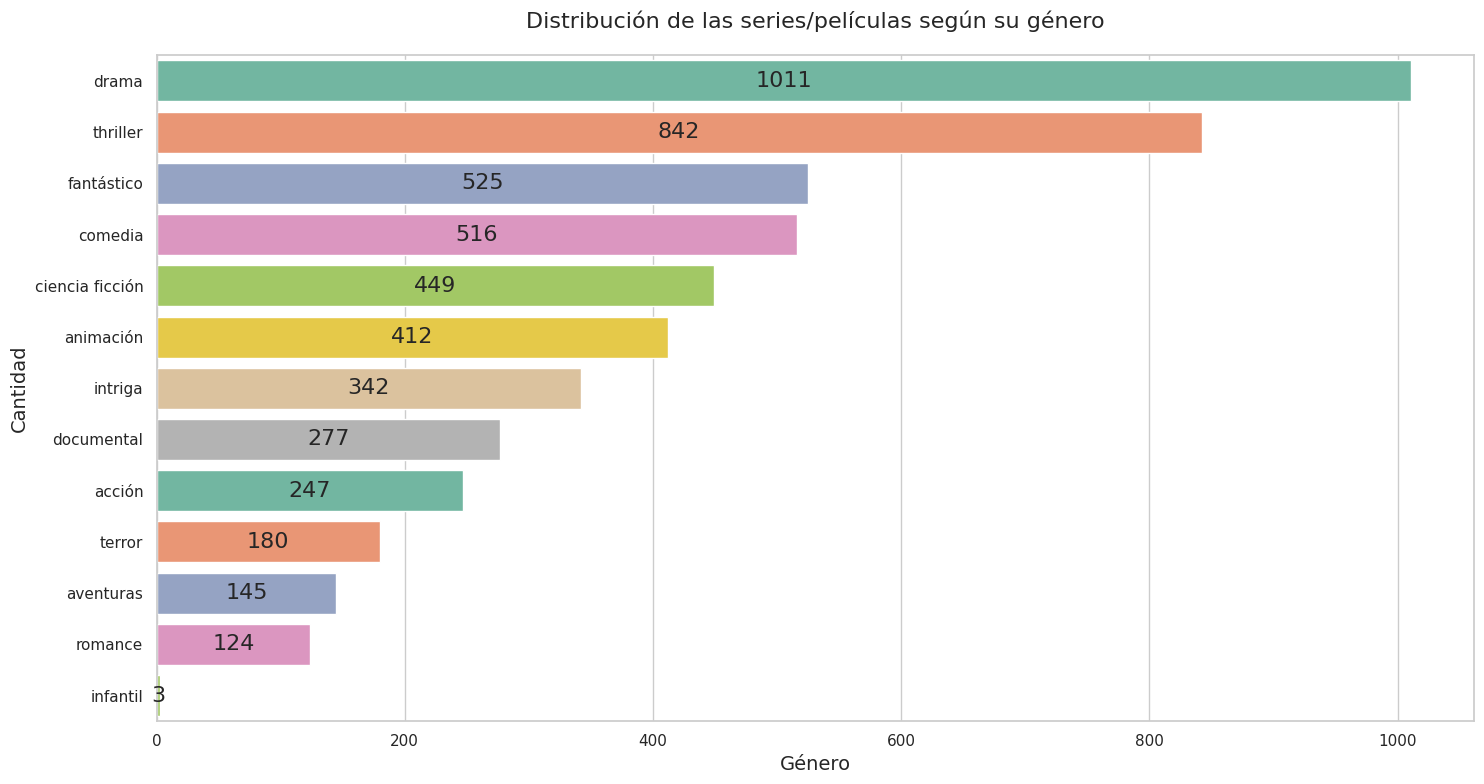

In [641]:
#variable de paleta de colores
colors2 = sns.color_palette("Set2")

#Creación de una variable para contar la cantidad de péliculas por género así como para extraer su index
c_gen = reviews["Género 1"].value_counts()
gen_ind = c_gen.index  # Usar el índice ordenado de value_counts()


sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))


ax = sns.barplot(
    x=c_gen,
    y=gen_ind,
    palette=colors2)


plt.xlabel("Género", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.title("Distribución de las series/películas según su género", fontsize=16, pad=20)

for container in ax.containers:
    ax.bar_label(container, fontsize=16, label_type="center")


plt.tight_layout()

plt.show()

Lo que se observa en este gráfico es que la mayor parte de las series y películas reseñadas pertenecen a los géneros de Drama, Thriller, Fantastico, Comedia y Ciencia Ficción.

Adicionalmente, hay muy pocas series y películas en este dataset que pertenezcan al género Romance, al de Aventuras y al de Terror. Prácticamente ninguna de las reseñas se le dedico al género infatil

In [642]:
#se eliminan duplicados del review 2 y se corrobora el resultado
reviews2 = reviews[["film_name", 'film_avg_rate',"Género 1"]].drop_duplicates().reset_index(drop=True)

reviews2.head()

film_name  film_avg_rate   Género 1
0          Respira (Serie de TV)            4.6      drama
1                 La liberación             4.5     terror
2             Kaos (Serie de TV)            6.4    comedia
3  Terminator Zero (Serie de TV)            5.9  animación
4            Príncipes salvajes             4.8      drama

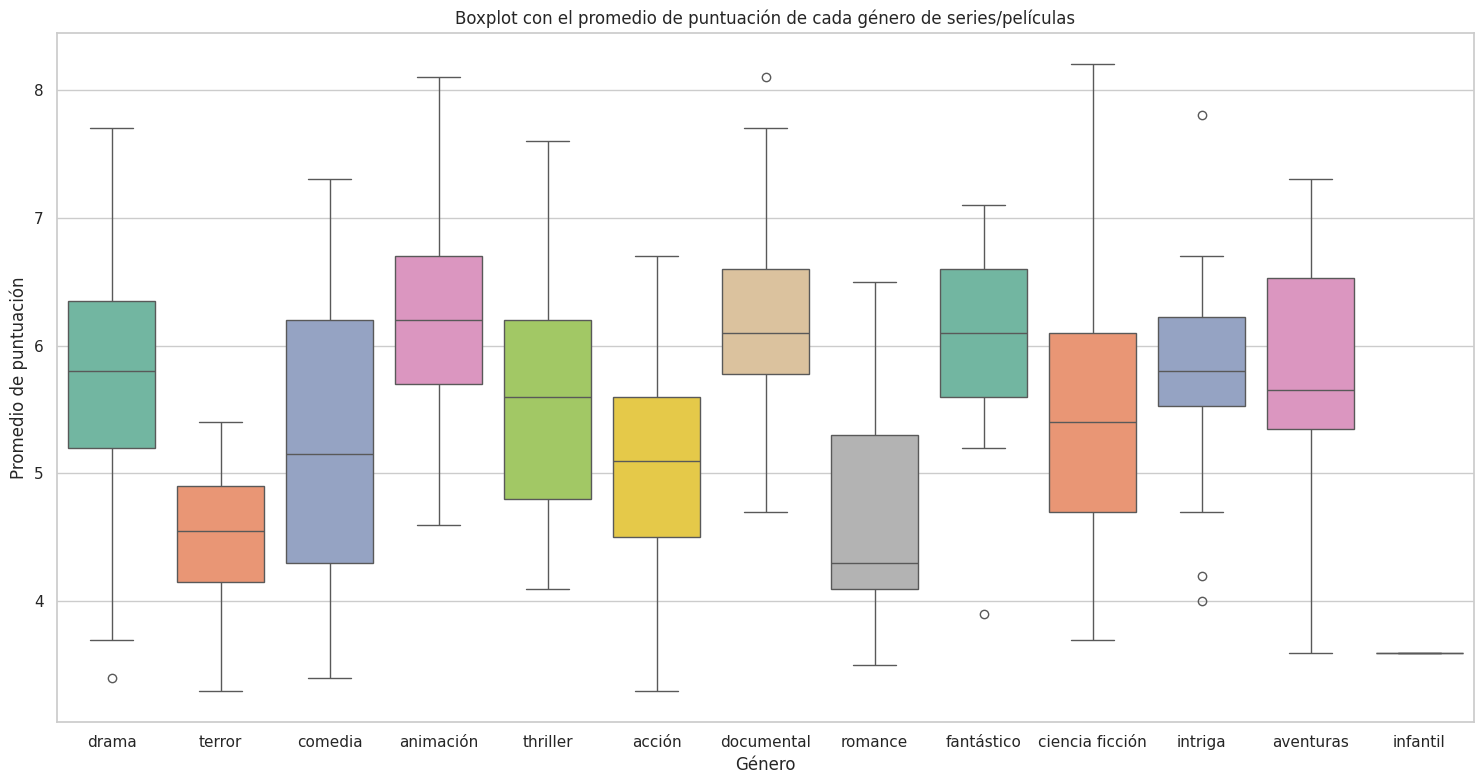

In [643]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=reviews2,
            x="Género 1",
            y= 'film_avg_rate',
            palette=colors2)

plt.xlabel("Género")
plt.ylabel("Promedio de puntuación")
plt.title("Boxplot con el promedio de puntuación de cada género de series/películas")

plt.tight_layout()
plt.show()

Teniendo en cuenta el gráfico anterior se puede decir que las puntuaciones del género terror son excesivamente bajas, con un 75% de los casos por debajo de un promedio de 5 puntos. Aunque esto puede ser debido a la poca cantidad de reseñas que tiene este género.

Algo similar se podría decir del género Drama y del género comedia, que tienen un 50% de los casos por debajo de los 6 puntos, aunque estos géneros si tienen un importante caudal de casos.

Cabe resaltar además el puntaje de las series y peliculas del género de Animación y del género Fantastico, que tienen un 50% de los casos por encima de los 6 puntos.


In [644]:
#listado de las 15 series o péliculas con mejor puntaje
reviews2_top = reviews2.sort_values(by="film_avg_rate", ascending=False).head(15)
reviews2_top

film_name  film_avg_rate  \
429                               Black Mirror (Serie de TV)            8.2   
274                     Samurái de ojos azules (Serie de TV)            8.1   
431                     Nuestro planeta II (Miniserie de TV)            8.1   
129                                 Ripley (Miniserie de TV)            7.8   
435     Este mundo no me hará mala persona (Miniserie de TV)            7.8   
266                                  The Crown (Serie de TV)            7.7   
239  La II Guerra Mundial: Desde el frente (Miniserie de TV)            7.7   
213                                 La sociedad de la nieve             7.6   
68                                                As bestas             7.6   
311      JoJo’s Bizarre Adventure: Golden Wind (Serie de TV)            7.6   
241                                      Hilda (Serie de TV)            7.5   
344                                    Top Boy (Serie de TV)            7.5   
291                                  Pluto (Miniserie de TV)            7.4   
293                 La vida en nuestro planeta (Serie de TV)            7.4   
392                             La inspiración más profunda             7.3   

            Género 1  
429  ciencia ficción  
274        animación  
431       documental  
129          intriga  
435        animación  
266            drama  
239       documental  
213            drama  
68          thriller  
311        animación  
241        animación  
344            drama  
291        animación  
293       documental  
392       documental

In [645]:
#listado de las 15 series o péliculas con peor puntaje
reviews2_los = reviews2.sort_values(by="film_avg_rate", ascending=True).head(15)
reviews2_los

film_name  film_avg_rate   Género 1
372                                Atrapaalmas             3.3     acción
271                              V de venganza             3.3     terror
292               El lado dulce de la traición             3.4      drama
37                          La familia Benetón             3.4    comedia
225                    Mi cuñado es un vampiro             3.4    comedia
298                           Disco Inferno (C)            3.5     terror
413                           A través del mar             3.5    romance
398  Don Cochecito y los caballeros templarios             3.6  aventuras
325                     Spy Kids: El armagedón             3.6   infantil
97                        La madre de la novia             3.6    romance
264                 Mejor Navidad, ¡imposible!             3.6    comedia
178               Mátame si te atreves, cariño             3.6    comedia
276                       Vacaciones de verano             3.7    comedia
165                                  Mea culpa             3.7      drama
350         El club de los lectores criminales             3.7     terror

# **Tokenización y stopwords**

In [646]:
from string import punctuation
import re

In [647]:
#instalación de spacy
!python -m spacy download es_core_news_md
import spacy
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [648]:
#creación de listado de stopwords con Spacy
nlp = spacy.load("es_core_news_md")

nlp.Defaults.stop_words
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [649]:
#inserción de nuevas palabras al listado de stopwords de Spacy
spacy_stopwords.update([".", ",", "!", "¡", ";", "-", "+", "/", "*","(" ")", "[","]", "`", "´", "`", "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que"

    # Pronombres
    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo', "blanco", "negro",

    # Preposiciones
    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras',

    # Conjunciones
    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',

    # Adverbios comunes
    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"

    # Verbos comunes (infinitivos)
    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer',

    # Palabras vacías adicionales
    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "cosas", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [650]:
#importanción y descarga de la librería NLTK
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [651]:
#Inserción de listado de palabras a los stopwords de NLTK
stopwords_es = set(stopwords.words('spanish'))
stopwords_es.update([ "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que", "*.*", "*."


    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo',


    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras', "blanco", "negro",


    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',


    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"


    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer', "películas",


    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "series", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "cosas", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [652]:
#inserción de listado de puntuaciones a los stopwords de NLTK
stopwords_es.update(list(punctuation))

In [653]:
#remplazo de los signos con espacios vaciós para evitar que no sean eliminados con los stopwords
reviews["review_text"] = reviews["review_text"].str.replace(r'\.', ' . ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\¿', ' ¿ ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\?', ' ? ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\!', ' ! ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\¡', ' ! ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\,', ' , ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\:', ' : ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\;', ' ; ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\(', ' ( ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\)', ' ) ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\-', ' - ', regex=True)

In [654]:
#aplicaicón de la tokenización
reviews["Reseñas"] = reviews["review_text"].apply(lambda x: word_tokenize(x, language='spanish'))

In [655]:
#aplicación de los stopwords de spacy y NLTK, así como la exclusi´n de todas las palabras que no tengan más de 4 letras
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in stopwords_es])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in spacy_stopwords])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if len(token) > 4])

In [656]:
reviews['Reseñas'].head()

0                                                                                                                                                                                                                                                                                                                                                                         [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]
1                                                                                                                                                                                                               [posee, respira, diálogos, penosos, personajes, puras, caricaturas, tramas, venir, actores, caras, vocalizar, cuotas, tocan, aitana, metida, viendo, temporada, dorada, comparar, ligera, viene, salvar, mundo, ápice, similitud, cuidado, basura, cuyos, implicados, excepción, positivamente, suelo, estómago, ofendido, viendo, respira, insultado, tonto]
2                                                                                                                                       [drama, médico, intenta, copiar, estilemas, yankies, adaptándolos, español, historia, transcurre, hospital, valenciano, representado, inverosímil, ambiente, hospital, representado, dista, realidad, hospitalaria, valenciana, española, guión, entremezcla, dramas, médicos, plateados, dramas, cotidianos, pueriles, riículos, diálogos, personajes, estereotipo, típica, netflix, distribuidora, suele, llenar, grilla, bazofias]
3    [obliga, quieras, dinero, público, involucrado, puedes, quejarte, producción, audiovisual, única, salida, verla, recomendarla, enemigo, producción, española, visionado, obliga, crítica, negativa, respira, opción, resulta, ofensiva, tantas, producirse, estrenarse, plataformas, canales, televisión, falta, talento, concreto, equipo, técnico, artístico, resultan, mediocres, culpa, guiones, planos, dirección, interpretaciones, historias, carecen, credibilidad, diálogos, vergüenza, ajena, sector, mejores, historias, contar, dándome, plataforma, merece]
4                                                                                                                                                                                                                                                                                             [vergüenza, ajena, únicas, personas, trabajan, hospital, médicos, rastro, enfermeras, celadores, personal, limpieza, favor, quieren, hospital, informen, poquito, funcionamiento, escenas, ridículas, diálogos, gracioso, liados, discoteca, hospital, quieres, perder, tiempo]
Name: Reseñas, dtype: object

In [657]:
#aplicación del Stemming

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import SnowballStemmer

# Inicializar stemmer para español
stemmer = SnowballStemmer('spanish')

def stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Aplicar a la columna "Reseñas" (que contiene listas de tokens)
reviews['review_stemming'] = reviews["Reseñas"].apply(stemming)

# Mostrar resultados
reviews['review_stemming'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                                                                                                                                                                                                                                                                                              [español, najw, duel, enseñ, cach, najw, papel, repet, aport, telenovel, mediod, guion, mediocr, dialog, plan, aspect, tecnic, fotograf, son, des, carl, monter]
1                                                                                                                                                                                           [pose, respir, dialog, penos, personaj, pur, caricatur, tram, ven, actor, car, vocaliz, cuot, toc, aitan, met, viend, tempor, dor, compar, liger, vien, salv, mund, apic, similitud, cuid, basur, cuy, implic, excepcion, posit, suel, estomag, ofend, viend, respir, insult, tont]
2                                                                                                        [dram, medic, intent, copi, estilem, yanki, adapt, español, histori, transcurr, hospital, valencian, represent, inverosimil, ambient, hospital, represent, dist, realid, hospitalari, valencian, español, guion, entremezcl, dram, medic, plat, dram, cotidian, pueril, riicul, dialog, personaj, estereotip, tipic, netflix, distribuidor, suel, llen, grill, bazofi]
3    [oblig, quier, diner, public, involucr, pued, quejart, produccion, audiovisual, unic, sal, verl, recomend, enemig, produccion, español, vision, oblig, critic, negat, respir, opcion, result, ofens, tant, produc, estren, plataform, canal, television, falt, talent, concret, equip, tecnic, artist, result, mediocr, culp, guion, plan, direccion, interpret, histori, carec, credibil, dialog, vergüenz, ajen, sector, mejor, histori, cont, dandom, plataform, merec]
4                                                                                                                                                                                                                                          [vergüenz, ajen, unic, person, trabaj, hospital, medic, rastr, enfermer, celador, personal, limpiez, favor, quier, hospital, inform, poquit, funcion, escen, ridicul, dialog, gracios, liad, discotec, hospital, quier, perd, tiemp]
Name: review_stemming, dtype: object

A primera vista, pareciera poco utilizable el proceso de Stemming en este dataset, por lo que se procede a la eliminación de la columna que se creó para utilizarlo

In [658]:
reviews = reviews.drop('review_stemming', axis=1)

# **Análisis de sentimientos**

In [659]:
from textblob import TextBlob

In [660]:
blob = TextBlob

In [661]:
#Creación de dos columnas para utilizar el analisis de sentimiento y la subjetividad de las reseñas
reviews["Sentimiento"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews["Subjetividad"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [662]:
#creación de una función para clasificar el sentimiento de las reseñas
def sent(x):
    if x > 0.6:
        return "Positivo"
    elif x >= -0.2 :
        return "Neutral"
    else:
        return "Negativo"

In [663]:
#aplicación de la función de la celda anterior y corroboración de la misma
reviews["Sentimiento 2"] = reviews["Sentimiento"].apply(sent)

reviews.head(1)

film_name  film_avg_rate  review_rate review_title  \
0  Respira (Serie de TV)            4.6            1      Respira   

                                                                                                                                                                                                                                                                                                                                                                                         review_text  \
0  como fan de las series españolas y de najwa ,  esto duele ,  la serie es muy mala . manu ríos da para lo que da ,  enseñar cacho ,  najwa hace de mala ,  papel repetido que no aporta ninguna capa nueva . telenovela de mediodía con un guión mediocre y diálogos planos . en aspectos técnicos como fotografía ,  sonido ,  también deja que desear . lo peor de carlos montero ,  de largo .    

  Género 1  \
0    drama   

                                                                                                                                                                                               Reseñas  \
0  [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]   

   Sentimiento  Subjetividad Sentimiento 2  
0         -0.5           1.0      Negativo

In [664]:
#creación de Dataframes para subdividir las reseñas positivas, negativas y neutrales
reviews_pos = reviews[reviews["Sentimiento 2"] == "Positivo"]
reviews_neut = reviews[reviews["Sentimiento 2"] == "Neutral"]
reviews_neg = reviews[reviews["Sentimiento 2"] == "Negativo"]

In [665]:
#Describe considerando solo las reseñas con un sentimiento positivo
reviews_pos.describe().round(0)

film_avg_rate  review_rate  Sentimiento  Subjetividad
count           34.0         34.0         34.0          34.0
mean             6.0          7.0          1.0           1.0
std              1.0          2.0          0.0           0.0
min              4.0          1.0          1.0           0.0
25%              5.0          5.0          1.0           1.0
50%              6.0          7.0          1.0           1.0
75%              7.0          8.0          1.0           1.0
max              8.0         10.0          1.0           1.0

In [666]:
#conteo de reseñas con una nota mayor a 7 en el DataFrame que incluye a todas las reseñas
rev_pos = reviews.loc[reviews["review_rate"] > 7, ["film_name"]]
rev_pos.count()

film_name    1417
dtype: int64

Lo que se observa a primera vista en la comparación entre la cantidad de series o películas que tienen un puntaje mayor a 7 y la cantidad que mostrarían un sentimiento positivo es que existe una diferencia enorme.

Mientras que habría 33 reseñas con un sentimiento positivo, hay 1417 series o películas que tienen un puntaje mayor a 7, lo cual es una discordancia muy grande entre el analizador de sentimiento y los puntajes que le pusieron los diferentes críticos

In [667]:
#Describe considerando solo las reseñas con un sentimiento negativo
reviews_neg.describe().round(0)

film_avg_rate  review_rate  Sentimiento  Subjetividad
count          429.0        429.0        429.0         429.0
mean             6.0          5.0         -0.0           1.0
std              1.0          3.0          0.0           0.0
min              3.0          1.0         -1.0           0.0
25%              5.0          3.0         -1.0           1.0
50%              6.0          6.0         -0.0           1.0
75%              7.0          7.0         -0.0           1.0
max              8.0         10.0         -0.0           1.0

In [668]:
#conteo de reseñas con una nota menor a 5 en el DataFrame que incluye a todas las reseñas
rev_neg = reviews.loc[reviews["review_rate"] < 5, ["film_name"]]
rev_neg.count()

film_name    1401
dtype: int64

Al igual que en la comparación de las reseñas positivas, existe una importante discordancia entre la cantidad de reseñas con sentimiento negativo y la cantidad de reseñas que tendrían un puntaje menor a los 5 puntos.

Dado esta discordancia, se descarta el análisis de sentimiento para este Dataset y se eliminan las columnas creadas con el mismo

In [669]:
reviews = reviews.drop("Sentimiento", axis=1)
reviews = reviews.drop("Subjetividad", axis=1)
reviews = reviews.drop("Sentimiento 2", axis=1)

# **WordCloud con todas las reseñas**

In [670]:
#importación de librerias necesarias para vectorizar palabras y crear la WordCloud
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

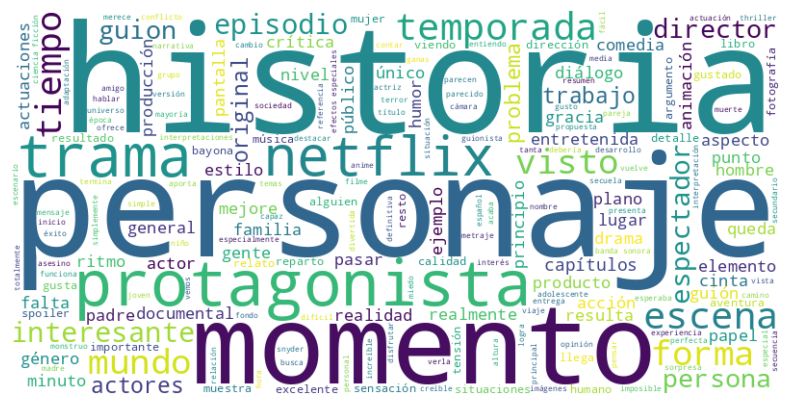

In [671]:
#Wordcloud con las palabras de mayor frecuencia, considerando todas las reseñas
text = ' '.join(reviews["Reseñas"].apply(lambda x: ' '.join(x)))

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()


A primera vista, en el conjunto de reseñas parecieran ser muy importantes diferentes claves como los personajes, la historia, los momentos, las tramas, las escenas y las temporadas, lo cual no supone ninguna sorpresa.

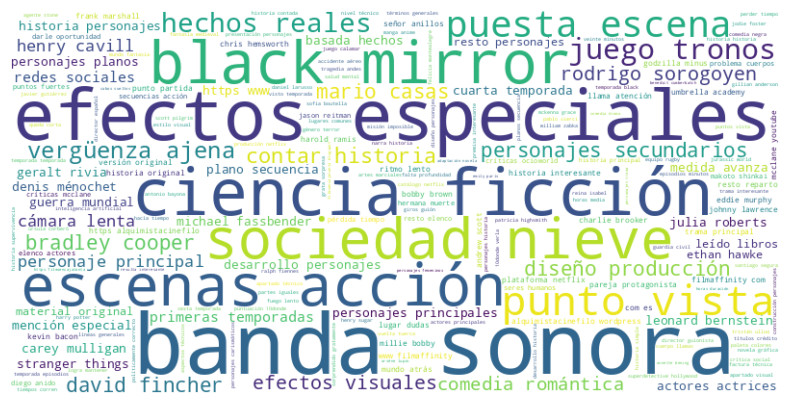

In [672]:
#Creación de un WordCloud con Bigramas

# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Convertir la columna 'Reseñas' de lista de tokens a string uniéndolos con un espacio
reviews["Reseñas_string"] = reviews["Reseñas"].apply(lambda x: ' '.join(x))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X = vectorizer.fit_transform(reviews["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observando ahora los Bigramas del conjunto de reseñas, se puede observar que salen en varias ocasiones las siguientes palabras:
Banda Sonora
Black Mirror
Ciencia Ficción
Escenas Acción
Efectos Especiales
Sociedad nieve
Puesta en escena

No sorprende que Black Mirror o Sociedad Nieve aparezcan en este listado. Black Mirror fue la serie con mayor promedio de puntuación, así como la Sociedad de la Nieve fue la película con mayor cantidad de reseñas

Pareciera ser relevante para el conjunto de las reseñas tanto la banda sonora, los efectos especiales, las escenas de acción y la puesta en escena, elementos que deben ser clave a la hora de elegirse una calificación.

# **Wordcloud para reseñas positivas**

In [673]:
#función para definir una calificación binaria en función de las diferentes puntuaciones
def cal(x):
    if x > 6:
        return "Aprobado"
    elif x < 7:
        return "Reprobado"


In [674]:
#aplicación de la función para crear una columna nueva en el DataFrame original
reviews["Calificación"] = reviews["review_rate"].apply(cal)

In [675]:
#división en dos Dataframes, las reseñas aprobadas y las reseñas desaprobadas
reviews_pos = reviews[reviews["Calificación"]== "Aprobado"]
reviews_neg = reviews[reviews["Calificación"]== "Reprobado"]

In [676]:
#creación de una variable para unir las diferentes reseñas, para facilitar la creación de la WordCloud
text2 = ' '.join(reviews_pos["Reseñas"].apply(lambda x: ' '.join(x)))

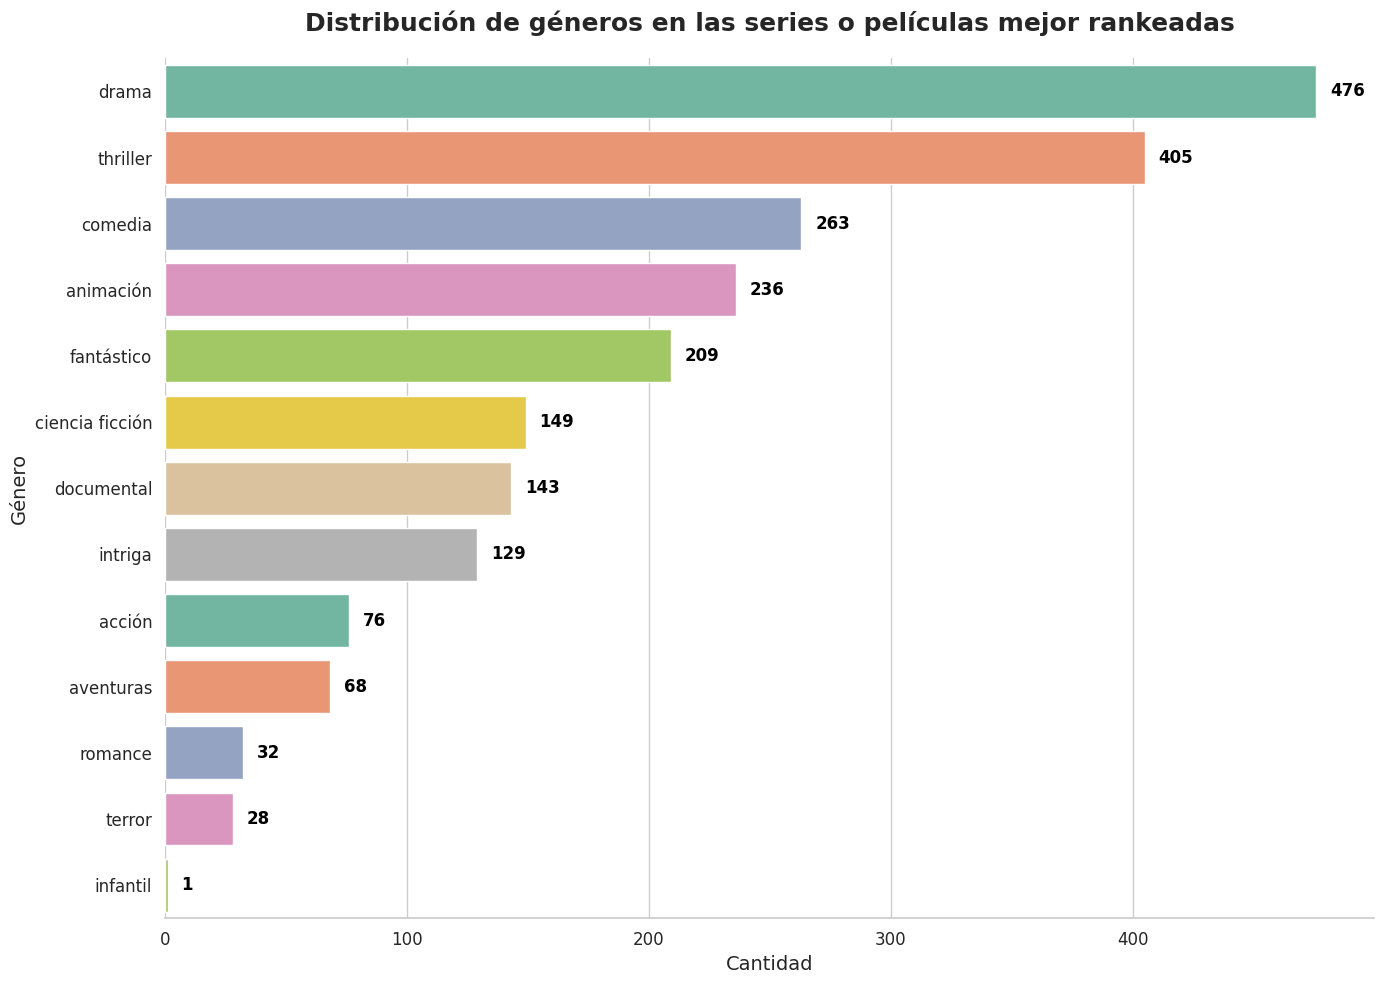

In [677]:
#Creación de una variable para contar la cantidad de péliculas por género así como para extraer su index
count_gen_pos = reviews_pos["Género 1"].value_counts()
gen_pos = count_gen_pos.index  # Usar el índice ordenado de value_counts()

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

ax = sns.barplot(
    x=count_gen_pos.values,  # Valores en eje X (cantidad)
    y=gen_pos,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros en las series o películas mejor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Género", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

Osbervando la cantidad de reseñas, se puede decir que casi la mitad de las series o películas del género "Drama" obtuvieron reseñas con un puntaje mayor a 7. Números similares obtuvo la categoría de Thriller, de Comedia y del género fantastico.

Cabe resaltar que el género de Animación obtuvo más de la mitad de las reseñas con un puntaje mayor a 7 puntos, así como también sucedió lo mismo con el género documental.

In [678]:
reviews_pos.describe().round(0)

film_avg_rate  review_rate
count         2215.0       2215.0
mean             7.0          8.0
std              1.0          1.0
min              3.0          7.0
25%              6.0          7.0
50%              7.0          8.0
75%              8.0          9.0
max              8.0         10.0

En los estadisticos de este Describe podemos observar que el promedio de puntuaciones de las reseñas positivas se encuentra en 8 puntos.

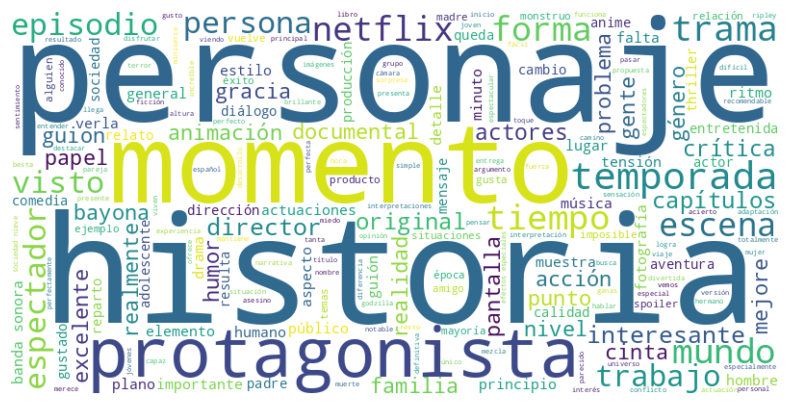

In [679]:
# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Similarmente a lo que sucedió en el primer WordCloud, en las reseñas positivas tienden a ser importantes los personajes, los protagonistas, la historia, los momentos, las escenas y los actores.

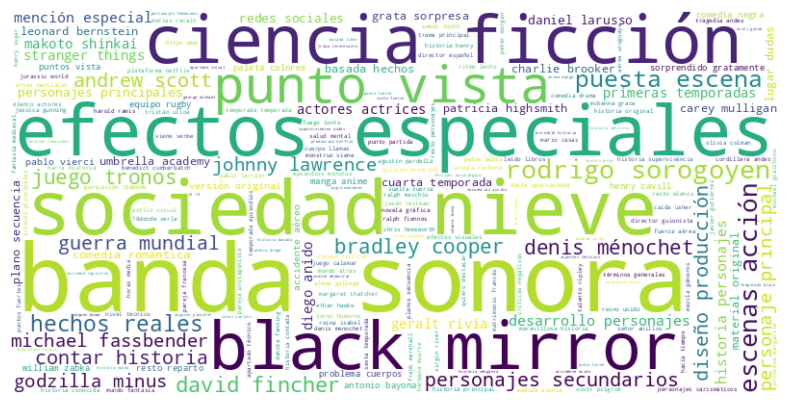

In [680]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X = vectorizer.fit_transform(reviews_pos["Reseñas_string"])

n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Como sucedió en el WordCloud con Bigramas del DataFrame original, se resaltan series como la Sociedad de la nieve y Black Mirror, así como elementos que tienen que ver con la banda sonora, las escenas de acción, los efectos especiales, la puesta en escena.

Cabe resaltar la continuidad de la idea de Ciencia Ficción como un punto clave en las reseñas positivas.

A lo ya indicado en el primer WordCloud de Bigramas, podemos observar la aparición de directores como Rodrigo Sorogoyen y David Fincher. Lo mismo sucede con actores como Andrew Scott, Denis Menochet, Bradley Cooper, Michael Fassbender, así como el personaje Johny Lawrence.

In [681]:
#variable para contar las  15 palabras que más salen en las reseñas positivas
textos_pos = pd.Series(text2)
count_pos = Counter(' '.join(textos_pos).split()).most_common(15)

In [682]:
count_pos

[('historia', 1991),
 ('personajes', 1430),
 ('temporada', 764),
 ('personaje', 621),
 ('mundo', 603),
 ('netflix', 597),
 ('momentos', 565),
 ('trama', 539),
 ('momento', 523),
 ('forma', 514),
 ('protagonista', 504),
 ('tiempo', 481),
 ('espectador', 470),
 ('director', 465),
 ('visto', 450)]

En este conteo de palabras, quizás sorprenda la palabra "Mundo" y "Protagonista", que tenían menos espacio hasta ahora.

# **Wordcloud para reseñas negativas**

In [683]:
#variable para la Wordcloud de reseñas negativas
text3= ' '.join(reviews_neg["Reseñas"].apply(lambda x: ' '.join(x)))

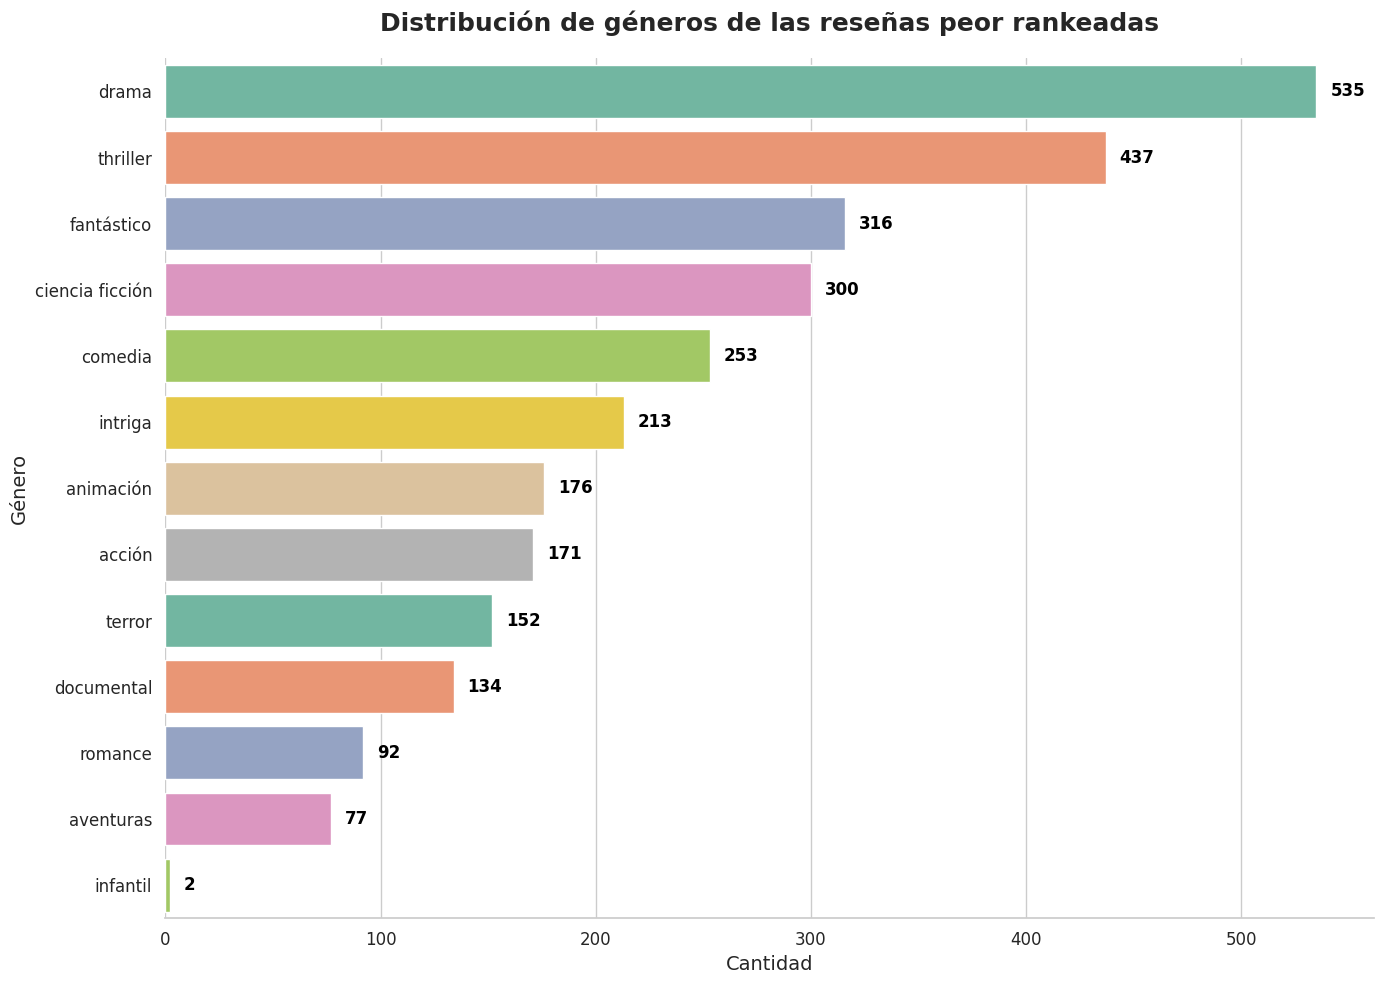

In [684]:
#variables para contar la cantidad de reseñas negativas según su género
count_gen_neg = reviews_neg["Género 1"].value_counts()
gen_neg = count_gen_neg.index


plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=count_gen_neg.values,  # Valores en eje X (cantidad)
    y=gen_neg,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros de las reseñas peor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Género", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
sns.despine(left=True)
plt.show()

En este ranking de reseñeas con puntajes bajos, podemos observar la predominancia cuantitativa del Drama, del Thriller y del género fantastico. Pero teniendo en cuenta los números en general, prácticamente las reseñas están repartidas en mitades.

En cambio géneros como la Ciencia Ficción (con 300 reseñas negativas sobre un total de 449), así como la categoría intriga (con 213 sobre un total de 342 reseñas) y el género Terror (con 152 reseñas negativas sobre un total de 180 películas) parecieran ser las categorías peor rankeadas.


In [685]:
reviews_neg.describe().round(0)

film_avg_rate  review_rate
count         2858.0       2858.0
mean             6.0          4.0
std              1.0          2.0
min              3.0          1.0
25%              5.0          3.0
50%              6.0          5.0
75%              6.0          6.0
max              8.0          6.0

En el describe anterior, se puede observar que el puntaje promedio de las reseñas negativas es de 4 puntos.

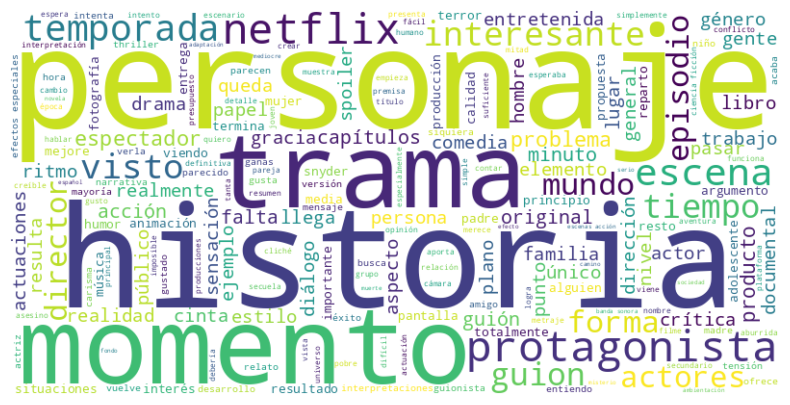

In [686]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text3)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


En las reseñas negativas, siguen predominando palabras como Historia, Personaje, Protagonista, Trama, Momento, Temporada, Episodio. Es llamativo el peso que tiene Netflix también en estas reseñas.

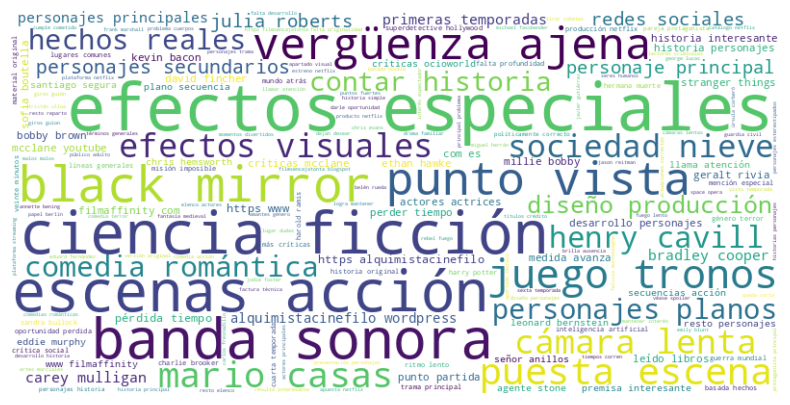

In [687]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X = vectorizer.fit_transform(reviews_neg["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este wordcloud de Bigramas para reseñas negativas, ya se puede apreciar la aparición de formulaciones más subjetivas como "Verguenza ajena", así como críticas más específicas como la cámara lenta.

Además, persisten frases como efectos especiales, efectos visuales, banda sonora, y aparece la comedia romántica como uno de los objetivos de la crítica.

Resulta curioso además que figure en estas reseñas la serie Black Mirror, que fue la serie con mayor puntaje promedio en las diferentes reseñas.

Finalmente, aparecen otros actores como Julia Robert, Mario Casas, Millie Bobby Brown, Kevin Bacon y Henry Cavill.

In [688]:
#contador de 15 palabras más comunes en reseñas negativas
textos_neg = pd.Series(text3)
count_neg = Counter(' '.join(textos_neg).split()).most_common(15)

In [689]:
count_neg

[('historia', 1843),
 ('personajes', 1583),
 ('netflix', 996),
 ('trama', 864),
 ('personaje', 735),
 ('visto', 636),
 ('temporada', 628),
 ('escenas', 625),
 ('protagonista', 620),
 ('momentos', 591),
 ('tiempo', 580),
 ('actores', 569),
 ('guion', 552),
 ('acción', 549),
 ('mundo', 534)]

Si bien en este contador no hay grandes novedades, sorprende el peso que tiene la palabra "Netflix". Quizás la plataforma de series recibe críticas por tener series o películas consideradas malas, cosa que no dejan pasar las diferentes reseñas.

# **Wordcloud para las 100 series/peliculas mejor rankeadas**

In [690]:
#variable para contar las 100 series y películas mejor rankeadas
rev_pos_top = (
    reviews_pos
    .sort_values(by="review_rate", ascending=False)
    .drop_duplicates(subset=["film_name"])  # Elimina duplicados basados en el nombre

)

rev_pos_top = rev_pos_top.head(100)

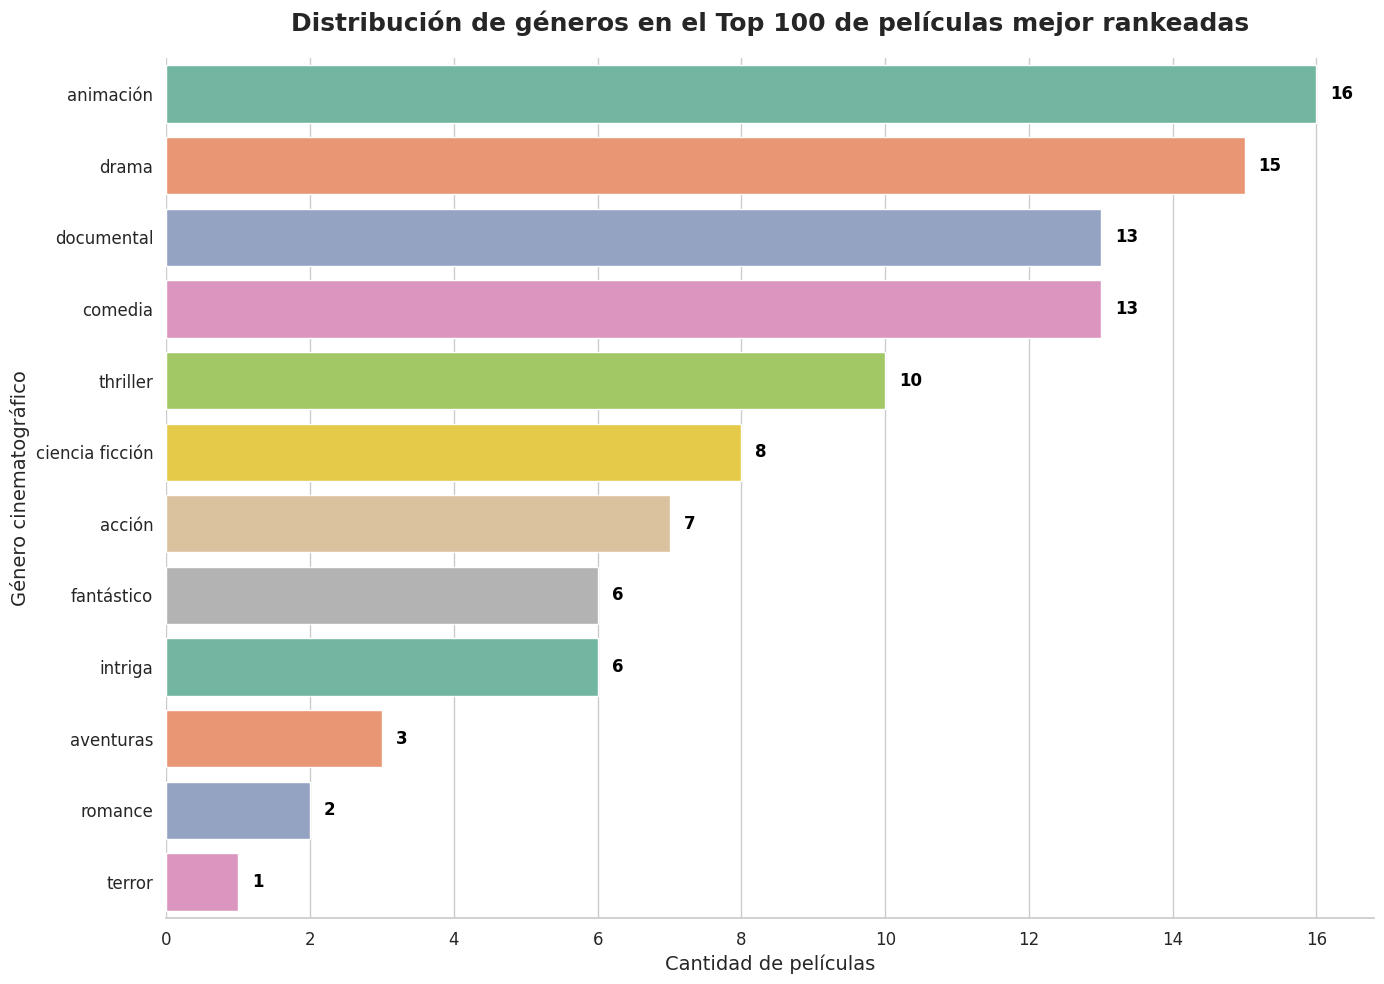

In [691]:
# Preparación de datos
count_top = rev_pos_top["Género 1"].value_counts()
gen_top = count_top.index  # Usar el índice ordenado de value_counts()

# Configuración de estilo
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Gráfico de barras
ax = sns.barplot(
    x=count_top.values,  # Valores en eje X (cantidad)
    y=gen_top,          # Géneros en eje Y
    palette=colors2
)

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')

# Personalización
plt.title("Distribución de géneros en el Top 100 de películas mejor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de películas", fontsize=14)
plt.ylabel("Género cinematográfico", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

En este gráfico, podemos apreciar el peso que tiene el género de animación que teniendo solamente 412 reseñas, logra ser la categoría con la mayor cantidad de reseñas en el top 100.

Además, cabe resaltar que la categoría comedia logra tener una mayor cantidad de reseñas en el top 100 que el género fantástico y el género Thriller.

In [692]:
rev_pos_top.describe()

film_avg_rate  review_rate
count     100.000000        100.0
mean        6.091000         10.0
std         1.081628          0.0
min         3.300000         10.0
25%         5.400000         10.0
50%         6.300000         10.0
75%         6.800000         10.0
max         8.200000         10.0

En el describe anterior podemos observar que todas las reseñas del top 100 tienen 10 puntos de calificación.

In [693]:
text4 = ' '.join(rev_pos_top["Reseñas"].apply(lambda x: ' '.join(x)))

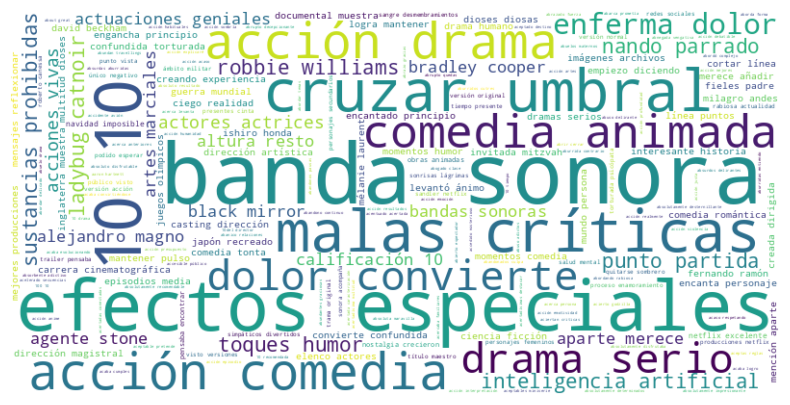

In [694]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X = vectorizer.fit_transform(rev_pos_top["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este wordcloud de bigramas de las series mejor rankeadas, podemos observar la relevancia que tienen los efectos especiales, la banda sonora, la acción y la comedia, así como el drama.

Resalta también el peso de la inteligencia artificial.

En gran medida, estos elementos parecieran indicar cierta relevancia de la ciencia ficción y la comedia por encima de otros géneros.

In [695]:
#palabras que más salen en el top 100 de reseñas positivas
txt_pos_100 = pd.Series(text4)
count_pos_100 = Counter(' '.join(txt_pos_100).split()).most_common(15)
count_pos_100

[('historia', 66),
 ('personajes', 47),
 ('personaje', 30),
 ('comedia', 30),
 ('netflix', 27),
 ('mundo', 26),
 ('acción', 25),
 ('excelente', 23),
 ('anime', 23),
 ('visto', 22),
 ('trama', 22),
 ('animación', 21),
 ('original', 21),
 ('sandler', 21),
 ('espectador', 20)]

En el conjunto de reseñas del top 100, parecieran ser muy relevantes la historia, los personajes, la comedia y el anime.

Figura también la palabra "mundo", lo cual cabria explorar con mayor profundidad.

Además, resalta la palabra Sandler, probablemente por el apellido del actor Adam Sandler.

# **Wordcloud para las 100 series/películas peor rankeadas**


In [566]:
#variable con el top 100 de peliculas peor rankeadas
rev_neg_top = (
    reviews_neg
    .sort_values(by="review_rate", ascending=True)
    .drop_duplicates(subset=["film_name"])  # Elimina duplicados basados en el nombre
)

rev_neg_top = rev_neg_top.head(100)

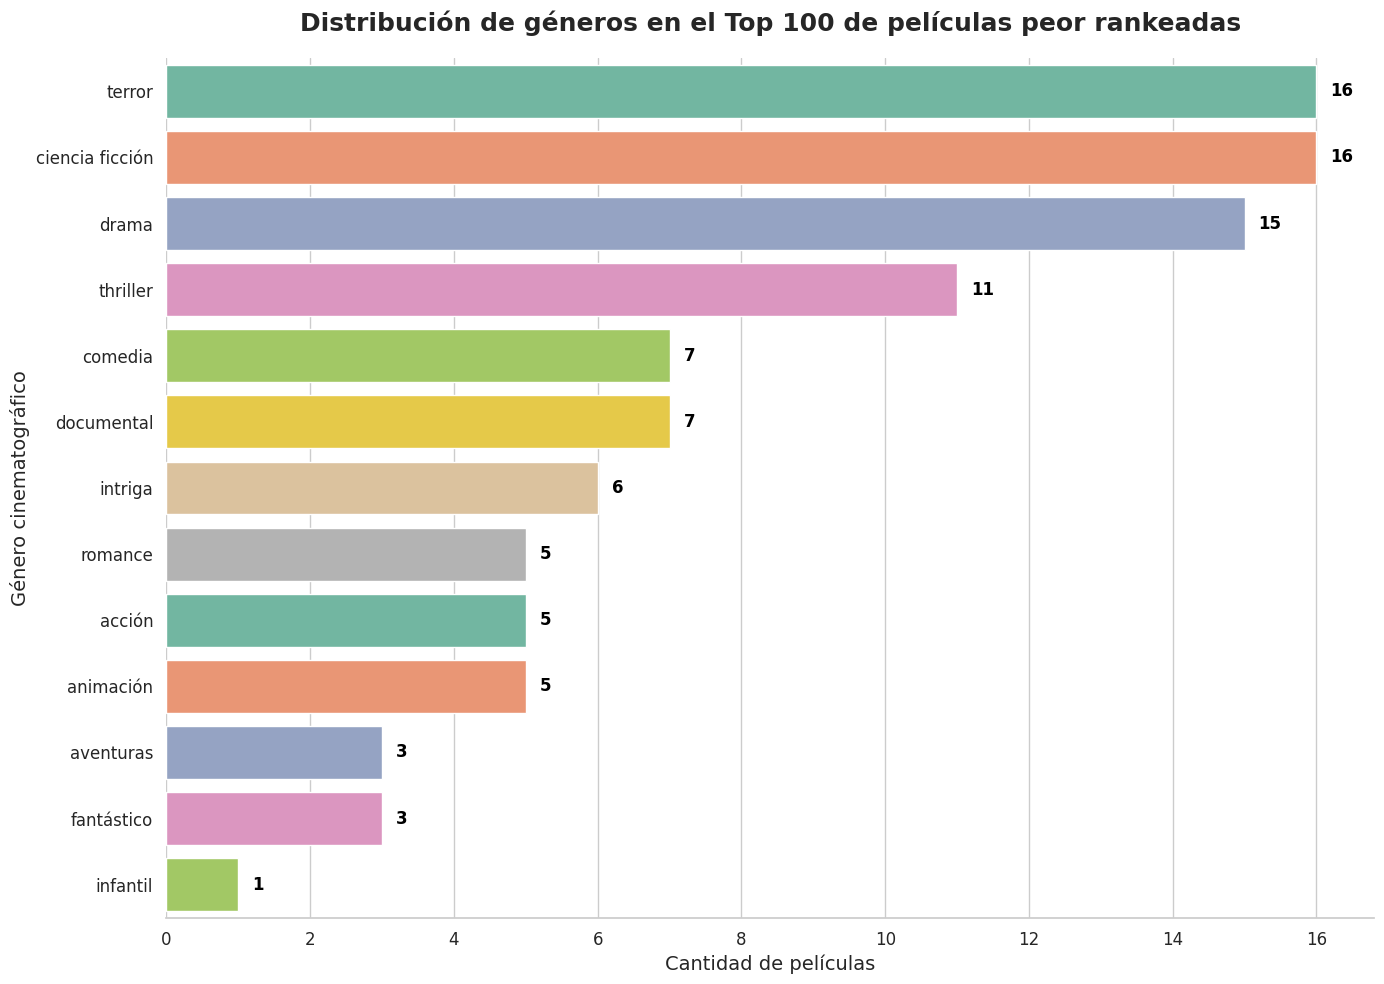

In [572]:
#Variables para hacer el contador de casos por género con su respectivo indice
count_top_neg = rev_neg_top["Género 1"].value_counts()
gen_top_neg = rev_neg_top["Género 1"].unique() # Usar el índice ordenado de value_counts()


plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=count_top_neg.values,  # Valores en eje X (cantidad)
    y=gen_top_neg,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros en el Top 100 de películas peor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de películas", fontsize=14)
plt.ylabel("Género cinematográfico", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

Resalta en este top 100 la aparición en tantas ocasiones de la categoría Terror así como de la ciencia ficción, lo que podría indicar la dificultad de realizar series o películas de estos géneros que contenten a los críticos.

Además, cabe señalar que hay pocos casos de series o películas de animación y del género fantastico en el top 100 de peores reseñas.

In [568]:
rev_neg_top.describe()

film_avg_rate  review_rate
count     100.000000        100.0
mean        5.495000          1.0
std         1.211675          0.0
min         3.300000          1.0
25%         4.475000          1.0
50%         5.600000          1.0
75%         6.300000          1.0
max         8.200000          1.0

En el describe anterior se puede observar que en todos las reseñas la calificación fue de tan solamente un punto.

In [569]:
#variable para crear la Wordcloud
text5= ' '.join(rev_neg_top["Reseñas"].apply(lambda x: ' '.join(x)))

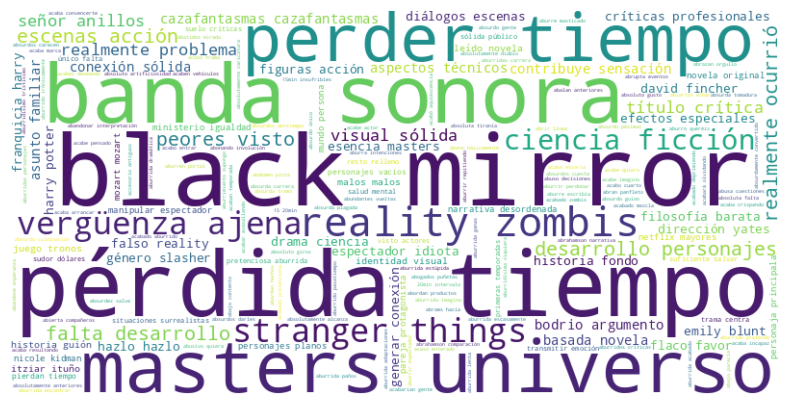

In [573]:
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X = vectorizer.fit_transform(rev_neg_top["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este Word Cloud, quizás lo más relevante sea la aparición de la idea de perdida de tiempo, como señal inequivoca de repudio en las reseñas.

In [571]:
txt_neg_100 = pd.Series(text5)
count_neg_100 = Counter(' '.join(txt_neg_100).split()).most_common(15)
count_neg_100

[('netflix', 44),
 ('historia', 39),
 ('personajes', 36),
 ('actores', 29),
 ('visto', 25),
 ('falta', 21),
 ('escenas', 21),
 ('trama', 21),
 ('crítica', 19),
 ('tiempo', 18),
 ('gente', 18),
 ('guión', 17),
 ('guion', 17),
 ('dirección', 16),
 ('actuaciones', 16)]

La aparición de netflix como la palabra más mencionada pareciera ser claramente un indicio de una crítica a la plataforma de series y películas en las reseñas

# **Modelo de regresión logística - BoW**

In [581]:
#función para crear una columna binaria de aprobación y desaprobación de las reseñas
#siendo 0=reprobado, 1=aprobado
def clas(x):
    if x == "Aprobado":
        return 1
    else:
        return 0

In [272]:
#preparación del DataFrame para crear un modelo de regresión logística
reviews_3 = reviews.drop(["film_name", "film_avg_rate", "review_rate", "review_title", "review_text", "Género 1", "Reseñas_string"], axis=1)
reviews_3["Calificación"] = reviews_3["Calificación"].apply(clas)
reviews_3.head()

Reseñas  \
0                                                                                                                                                                                                                                                                                                                                                                       [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]   
1                                                                                                                                                                                                             [posee, respira, diálogos, penosos, personajes, puras, caricaturas, tramas, venir, actores, caras, vocalizar, cuotas, tocan, aitana, metida, viendo, temporada, dorada, comparar, ligera, viene, salvar, mundo, ápice, similitud, cuidado, basura, cuyos, implicados, excepción, positivamente, suelo, estómago, ofendido, viendo, respira, insultado, tonto]   
2                                                                                                                                     [drama, médico, intenta, copiar, estilemas, yankies, adaptándolos, español, historia, transcurre, hospital, valenciano, representado, inverosímil, ambiente, hospital, representado, dista, realidad, hospitalaria, valenciana, española, guión, entremezcla, dramas, médicos, plateados, dramas, cotidianos, pueriles, riículos, diálogos, personajes, estereotipo, típica, netflix, distribuidora, suele, llenar, grilla, bazofias]   
3  [obliga, quieras, dinero, público, involucrado, puedes, quejarte, producción, audiovisual, única, salida, verla, recomendarla, enemigo, producción, española, visionado, obliga, crítica, negativa, respira, opción, resulta, ofensiva, tantas, producirse, estrenarse, plataformas, canales, televisión, falta, talento, concreto, equipo, técnico, artístico, resultan, mediocres, culpa, guiones, planos, dirección, interpretaciones, historias, carecen, credibilidad, diálogos, vergüenza, ajena, sector, mejores, historias, contar, dándome, plataforma, merece]   
4                                                                                                                                                                                                                                                                                           [vergüenza, ajena, únicas, personas, trabajan, hospital, médicos, rastro, enfermeras, celadores, personal, limpieza, favor, quieren, hospital, informen, poquito, funcionamiento, escenas, ridículas, diálogos, gracioso, liados, discoteca, hospital, quieres, perder, tiempo]   

   Calificación  \
0             0   
1             0   
2             0   
3             0   
4             0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    review_steming  
0                                                                                                                                                                                                                                                                                                                                                      [española, najwa, duel, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocr, diálogo, plano, aspecto, técnico, fotografía, sonido, desear, carlo, montero]  
1           

In [583]:
#creación de las variables para el modelo de regresión
X= reviews_3['Reseñas']
X= X.apply(lambda x: ' '.join(x))
y= reviews_3['Calificación']

In [584]:
#importación y validación simple de los datos del modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [612]:
#importación de librerías para el modelo de Regresión, el Bag of Words (BoW) y la vectorización
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [586]:
# Inicializar el CountVectorizer (BoW)
vectorizador_bow = CountVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_bow = vectorizador_bow.fit_transform(X_train)

X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 274852 stored elements and shape (3551, 39917)>

In [587]:
# Transformar las reseñas de testeo
X_test_bow = vectorizador_bow.transform(X_test)
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 108486 stored elements and shape (1522, 39917)>

In [599]:
#creación de variable de validación cruzada
S_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#creación de modelo de regresión logística
reg_log_bow = LogisticRegression(
    C=0.009,                #
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    n_jobs=-1
)

#validación cruzada
cv_scores = cross_val_score(
    estimator=reg_log_bow,
    X=X_train_bow,
    y=y_train,
    cv=S_kfold,
    scoring='accuracy',
    n_jobs=-1
)

#entrenamiento del modelo
reg_log_bow.fit(X_train_bow, y_train)

LogisticRegression(C=0.009, max_iter=1000, n_jobs=-1, solver='liblinear')

El modelo creado en la celda anterior tiene una importante penalización al overfitting, ya que en diferentes pruebas con grillas el modelo tendió a adaptarse demasiado a los datos de entrenamiento, por lo que se procedió a crear un modelo que directamente defina una fuerte penalización para evitar el sobre-ajuste

In [600]:
#predicciones del modelo de regresión logistica
y_pred_train_bow = reg_log_bow.predict(X_train_bow)
y_pred_test_bow= reg_log_bow.predict(X_test_bow)

In [601]:
print("Reporte de clasificación con datos de entrenamiento:")
print(classification_report(y_train, y_pred_train_bow))

Reporte de clasificación con datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1995
           1       0.94      0.76      0.84      1556

    accuracy                           0.87      3551
   macro avg       0.89      0.86      0.87      3551
weighted avg       0.88      0.87      0.87      3551



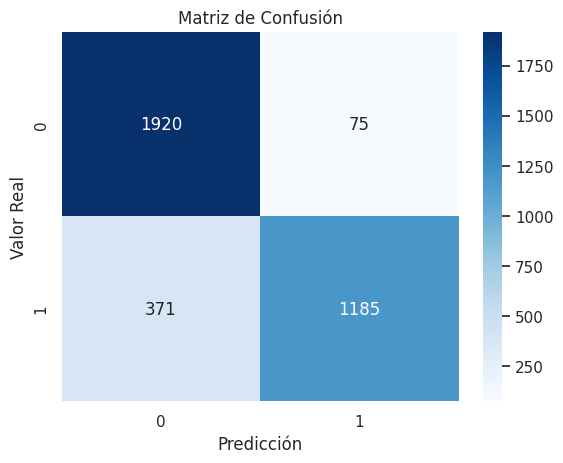

In [602]:
#matriz de confusión del modelo de regresión con datos de entrenamiento
cm = confusion_matrix(y_train, y_pred_train_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [603]:
print("Reporte de clasificación con datos de testeo:")
print(classification_report(y_test, y_pred_test_bow))

Reporte de clasificación con datos de testeo:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       863
           1       0.80      0.55      0.65       659

    accuracy                           0.75      1522
   macro avg       0.76      0.72      0.73      1522
weighted avg       0.76      0.75      0.74      1522



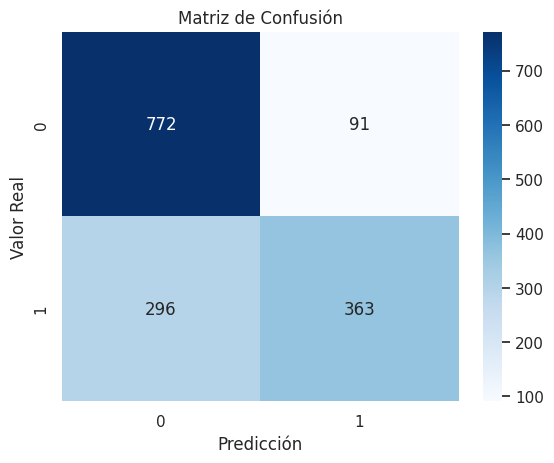

In [604]:
#matriz de confusión con datos de testeo
cm = confusion_matrix(y_test, y_pred_test_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Observando globalmente las métricas del reporte, se puede ver cierto overfitting con los datos de entrenamiento, ya que el accuracy es de 0.87 con datos de train, mientras que tan solamente alcanza un 0.75 con los datos de testeo

Adicionalmente, comparando las diferentes metricas de las variables binarias, el modelo pareciera detectar de mejor manera las películas y series desaprobadas, ya que el Recall en esa clase de datos se encuentra entre 0.89 y 0.96.

Contrariamente, el recall para detectar las películas y series calificadas con un puntaje de 7 o mayor es bastante más bajo, alcanzando 0.75 en los datos de entrenamiento y 0.55 en los datos de testeo.

In [606]:
# Obtenemos las palabras del vocabulario
palabras_bow = vectorizador_bow.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes_bow = reg_log_bow.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef_bow = pd.DataFrame({'palabra': palabras_bow, 'coeficiente': coeficientes_bow})

df_coef_bow = df_coef_bow.sort_values(by='coeficiente', ascending=False)

print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef_bow.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef_bow.tail(10))

🔼 Palabras más asociadas a reseñas positivas:
            palabra  coeficiente
31625  recomendable     0.205386
4664         bayona     0.179178
16139     excelente     0.178122
35478     sorogoyen     0.169624
28502      perfecta     0.168170
17472         forma     0.163006
33281        ripley     0.157508
12102       detalle     0.146397
22488        karate     0.145305
26559       notable     0.137820

🔽 Palabras más asociadas a reseñas negativas:
         palabra  coeficiente
34967   siquiera    -0.142348
16754      falta    -0.142624
15158    escenas    -0.145120
26318    netflix    -0.155381
25201    minutos    -0.162774
372     aburrida    -0.163046
18788      guion    -0.163511
30956      queda    -0.175092
30264   producto    -0.186956
34355  sensación    -0.197200


Como se denota por las palabras asociadas a las reseñas positivas, pareciera haber varias palabras que no necesariamente denotan una aprobación en la reseña (como "Karate", "sorogoyen" o "ripley") pero que son calificadas como positivass

Algo similar sucede con palabras como "siquiera", "minutos" o "sensación" o "producto" en las reseñas negativas.

In [610]:
#Prueba con reseña positiva

reseña_1 = "Es una gran serie, con buenos personajes, una historia divertida"  # Reemplaza con la reseña que deseas probar
nueva_reseña_bow = vectorizador_bow.transform([reseña_1])
prediccion = reg_log_bow.predict(nueva_reseña_bow)

# Obtener la probabilidad de la predicción
prob_positiva = reg_log_bow.predict_proba(nueva_reseña_bow)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_positiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.50


In [605]:
#Prueba con reseña negativa

reseña_2 = "Es una película pesima, personajes aburridos y previsibles"  # Reemplaza con la reseña que deseas probar
nueva_reseña_bow_2 = vectorizador_bow.transform([reseña_2])
prediccion = reg_log_bow.predict(nueva_reseña_bow_2)

# Obtener la probabilidad de la predicción
prob_negativa = reg_log_bow.predict_proba(nueva_reseña_bow_2)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_negativa[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.44


Observando estos dos casos, el predictor creado no puede predecir correctamente una valoración positiva. Adicionalmente, aunque puede detectar que el segundo caso es una reseña negativa, se encuentra en valores muy cercanos a introducirla en la categoría de reseñas positivas, incluso a pesar de contener palabras como "pesima", "aburridos" y "previsibles"

# **TF-IDF**

In [611]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['01' '02' '03' ... 'útiles' 'útima' '한복vestimenta']
Matriz TF-IDF de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [614]:
# 2. Configuración del modelo y búsqueda de hiperparámetros
modelo_rl = LogisticRegression(
    solver='saga',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

parametros = {
    'C': [0.2, 0.25],
    'penalty': ['l1', 'l2'],
}

grid_tf_idf = HalvingGridSearchCV(
    modelo_rl,
    param_grid=parametros,
    cv=S_kfold,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)
grid_tf_idf.fit(X_train_tfidf, y_train)

# 4. Mejor modelo encontrado
reg_log_tf_idf = grid_tf_idf.best_estimator_


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1183
max_resources_: 3551
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 1183
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 3549
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [615]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = reg_log_tf_idf
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.25, max_iter=1000, n_jobs=-1, random_state=42,
                   solver='saga')

In [616]:
# Hacer predicciones en el conjunto de train
y_pred_tfidf_train = modelo_tfidf.predict(X_train_tfidf)

# Reporte de clasificación con datos de train
print("Reporte de clasificación con datos de train:")
print(classification_report(y_train, y_pred_tfidf_train))

Reporte de clasificación con datos de train:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1995
           1       0.97      0.54      0.70      1556

    accuracy                           0.79      3551
   macro avg       0.85      0.77      0.77      3551
weighted avg       0.84      0.79      0.78      3551



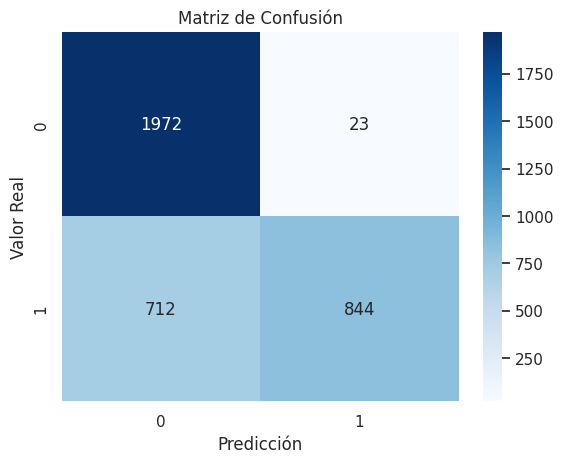

In [328]:
cm = confusion_matrix(y_train, y_pred_tfidf_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [617]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf_test = modelo_tfidf.predict(X_test_tfidf)

# Reporte de clasificación con datos de test
print("Reporte de clasificación con datos de test:")
print(classification_report(y_test, y_pred_tfidf_test))

Reporte de clasificación con datos de test:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       863
           1       0.88      0.37      0.52       659

    accuracy                           0.70      1522
   macro avg       0.77      0.66      0.65      1522
weighted avg       0.76      0.70      0.67      1522



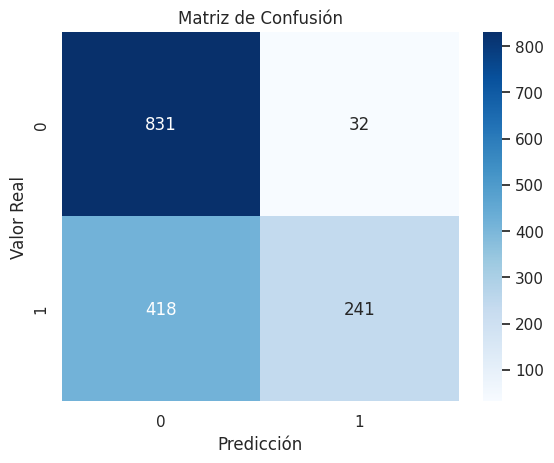

In [618]:
cm = confusion_matrix(y_test, y_pred_tfidf_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Observando el segundo modelo de regresión logistica, usando el TF-IDF, se desarrollo un modelo que aparentemente en la metrica accuracy tiende a tener un menor overfitting, ya que alcanza un 0.79 en los datos de prueba y 0.70 en los datos de testeo

Sin embargo, en lo que concierne a detectar valoraciones positivas, este modelo funciona incluso peor que el anterior, debido a que el recall de las valoraciones positivas alcanza solamente un 0.54 en los datos de entrenamiento, así como un 0.37 en los datos de testeo.

Esto significa que le es muy dificultoso a este modelo detectar las reseñas positivas.

In [619]:
# Obtenemos las palabras del vocabulario
palabras = vectorizador_tfidf.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes = modelo_tfidf.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef = pd.DataFrame({'palabra': palabras, 'coeficiente': coeficientes})

# Ordenamos por importancia
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

# En la primera columna veremos el número "índice" de cada palabra según el órden en que fueron procesadas en el modelo.

# Mostramos las 10 palabras más asociadas a valoración positiva y negativa
print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef.tail(10))

🔼 Palabras más asociadas a reseñas positivas:
            palabra  coeficiente
4664         bayona     1.081656
16139     excelente     0.885031
35478     sorogoyen     0.874371
31625  recomendable     0.834898
19477      historia     0.833054
33281        ripley     0.766018
17472         forma     0.741241
22488        karate     0.697990
2392      animación     0.666435
39692        zahera     0.597777

🔽 Palabras más asociadas a reseñas negativas:
         palabra  coeficiente
6163      carece    -0.523581
34355  sensación    -0.555671
25201    minutos    -0.580747
18788      guion    -0.581934
15158    escenas    -0.623435
35068     snyder    -0.625333
37550      trama    -0.640440
26318    netflix    -0.668528
30264   producto    -0.677295
372     aburrida    -0.724893


Al igual que en el modelo anterior, tenemos palabras que no tienen necesariamente que ver con reseñas positivas o negativas, como "Bayona", "Sorogoyen", "historia", "Ripley", "Karate", "Animación", "Zahera", "sensación", "guión", "snyder", "producto".

Aunque es altamente sugestivo que netflix suele estar asociado a reseñas negativas para el modelo de TF-IDF.

In [620]:
#Prueba con reseña positiva

reseña_3 = "Es una gran serie, con buenos personajes, una historia divertida"
nueva_reseña_tf_idf_1 = vectorizador_tfidf.transform([reseña_3])
prediccion_3 = modelo_tfidf.predict(nueva_reseña_tf_idf_1)

# Obtener la probabilidad de la predicción
prob_positiva = modelo_tfidf.predict_proba(nueva_reseña_tf_idf_1)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_positiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion_3[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.47


In [621]:
#Prueba con reseña negativa

reseña_4 = "Es una película pesima, personajes aburridos y previsibles"  # Reemplaza con la reseña que deseas probar
nueva_reseña_tf_idf_2 = vectorizador_tfidf.transform([reseña_4])
prediccion_4 = modelo_tfidf.predict(nueva_reseña_tf_idf_2)

# Obtener la probabilidad de la predicción
prob_negativa = modelo_tfidf.predict_proba(nueva_reseña_tf_idf_2)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_negativa[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion_4[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.41


Como sucedió como el modelo de regresión logistica combinado con el Bag of Words, se observa que el modelo no puede detectar adecuadamente una reseña positiva.

Sin embargo, puede detectar adecuadamente la reseña negativa e incluso le da menos probabilidad que el modelo anterior de pertenecer a una reseña negativa.